In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

## generate_data

generates data, returns sparse data if sparsity=True

In [3]:
#global d parameter
d = 1000
#generate data function
def generate_data(sparsity=False):
    d = 1000 
    nmax = 10000 
    
    ground_truth = np.random.randn(d, 1)
    print(ground_truth.shape)
    if sparsity == True:
        sample = np.random.choice(ground_truth.reshape(d), size=20)
        ground_truth = np.append(sample , np.zeros((d-20, 1)))
        np.random.shuffle(ground_truth)
        ground_truth = ground_truth.reshape(d, 1)
    #generating X 
    X = 1 * np.random.randn(nmax, d)
    e = .1 * np.random.randn(nmax, 1)
    
    print(ground_truth.shape)
    print(X.shape)
    y = np.matmul(X, ground_truth) + e 
    
    return X, y, e, ground_truth

X, y, e, ground_truth = generate_data(sparsity=True)



(1000, 1)
(1000, 1)
(10000, 1000)


## Gradient Descent

get_lr: returns alpha/L values to 

calculateGD: returns pandas dataframe of z* and n. 



In [4]:
def get_lr(M):
    hessian_eigh_vals = np.linalg.eig(np.matmul(M.T, M))[0]
    alpha = min(hessian_eigh_vals)
    L = max(hessian_eigh_vals)
    return alpha, L 


def calculateGD(ranges, q):
    #takes in range array and parameter for high/low dimensions to determine learning rate
    w_pred = {}
    for n in ranges:
        print('predicting for', n)
        
        X_n = X[:n, :]
        Y_n = y[:n, :]
        alpha, L = get_lr(X_n)
        
        if q == 1:
            lr0 = 2/(alpha + L)
        else:
            lr0 = 1/L 
        
        w = np.zeros((d, 1))
        for i in range(100):
            grad = np.sum((np.matmul(X_n, w) - Y_n) * X_n, axis=0).reshape(1000, 1)
            w = w - lr0*grad
        w_pred[n] = w
    norms = [np.linalg.norm(ground_truth-w_pred[n]) for n in w_pred.keys()]
    return pd.DataFrame(data=norms, index=w_pred.keys(), columns = ['z*'])
     

## Question 1

We recover the true model after 2500

predicting for 1000
predicting for 1500
predicting for 2000
predicting for 2500
predicting for 3000
predicting for 3500
predicting for 4000
predicting for 4500
predicting for 5000
predicting for 5500
predicting for 6000
predicting for 6500
predicting for 7000
predicting for 7500
predicting for 8000
predicting for 8500
predicting for 9000
predicting for 9500
predicting for 10000


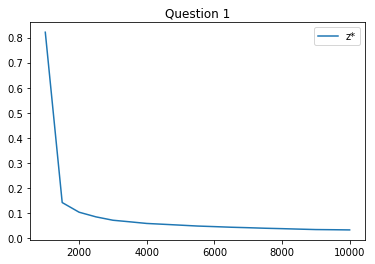

In [5]:
q1 = range(1000, 10001, 500)

q_1 = calculateGD(q1, 1)
q_1.plot(title='Question 1')

## Question 2

We are unable to recover the true model with this low dimensional data

predicting for 100
predicting for 200
predicting for 300
predicting for 400
predicting for 500
predicting for 600
predicting for 700
predicting for 800
predicting for 900
predicting for 1000


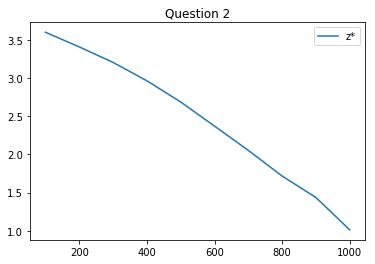

In [8]:
q2 = range(100, 1001, 100)
q_2 = calculateGD(q2, 2)
q_2.plot(title='Question 2')

## Generating Data for Questions 3 & 4

In [50]:
#generating data for 3 & 4
X, y, e, ground_truth = generate_data(sparsity=True)


(1000, 1)
(1000, 1)
(10000, 1000)


## Question 3
We are unable to recover the true model given the sparsity of the data and high dimesionality

predicting for 100
predicting for 200
predicting for 300
predicting for 400
predicting for 500
predicting for 600
predicting for 700
predicting for 800
predicting for 900
predicting for 1000


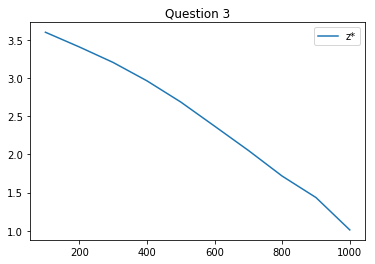

In [9]:
q3 = range(100, 1001, 100)
q_3 = calculateGD(q3, 2)
q_3.plot(title='Question 3')

## Question 4
augmented gradient descent function to run projected_gd

In [55]:

def hard_threshold(arr):
    a = np.abs(arr)
    ind = np.argpartition(a, -20)[-20:]
    new = []
    for i, a in enumerate(arr):
        if i in ind:
            new += [a]
        else:
            new += [0]
    return np.asarray(new).reshape(1000, 1)






def projected_gd(ranges, q):
    w_pred = {}
    for n in ranges:
        print('predicting for', n)
        
        X_n = X[:n, :]
        Y_n = y[:n, :]
        alpha, L = get_lr(X_n)
        
        if q == 1:
            lr0 = 2/(alpha + L)
        else:
            lr0 = 1/L 
        
        w = np.zeros((d, 1))
        for i in range(100):
            grad = np.sum((np.matmul(X_n, w) - Y_n) * X_n, axis=0).reshape(1000, 1)
            w = w - lr0*grad

            sp = (w != 0).sum()
            if sp > 20:
                w = hard_threshold(w.reshape(1000))
        w_pred[n] = w
    norms = [np.linalg.norm(ground_truth-w_pred[n]) for n in w_pred.keys()]
    return pd.DataFrame(data=norms, index=w_pred.keys(), columns = ['z*'])
     

## Question 4
After leveraging our prior knowledge, we are able to fit the model even though there's high dimensions 

predicting for 100
predicting for 200
predicting for 300
predicting for 400
predicting for 500
predicting for 600
predicting for 700
predicting for 800
predicting for 900
predicting for 1000


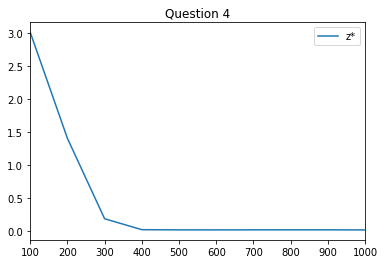

In [56]:
#use same range from q3
q_4 = projected_gd(q3, 2)
q_4.plot(title='Question 4')